In [1]:
load("~/Downloads/CASdatasets/data/ausprivauto0405.rda")

La régression linéaire prends la forme suivante d'habitute:

$$y=\beta X + \epsilon$$

On trouve nos bétas avec: 

$$\beta = (X^TX)^{-1}X^Ty$$

In [3]:
library(MASS)

In [4]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
?Boston

In [14]:
X <- Boston[-ncol(Boston)]

In [15]:
y <- Boston$medv

In [ ]:
betas <- 

In [18]:
load("~/Downloads/CASdatasets/data/norauto.rda")

In [19]:
head(norauto)

Male,Young,DistLimit,GeoRegion,Expo,ClaimAmount,NbClaim
0,0,12000 km,Low+,0.789,0,0
0,1,12000 km,Medium+,0.200,0,0
0,1,25000-30000 km,Medium+,0.285,0,0
0,0,12000 km,Medium-,0.247,0,0
0,0,12000 km,High-,0.995,18158,1
0,0,12000 km,Medium+,0.222,0,0


In [30]:
library(ggplot2)

In [36]:
library(dplyr)

In [42]:
dim(filter(norauto,Expo<=1.00))

[1] 154418      7

In [47]:
(dim(norauto)[1]-dim(filter(norauto,Expo<=1.00))[1])/dim(norauto)[1]

[1] 0.1607672

In [48]:
norauto <- filter(norauto,Expo<=1.00)

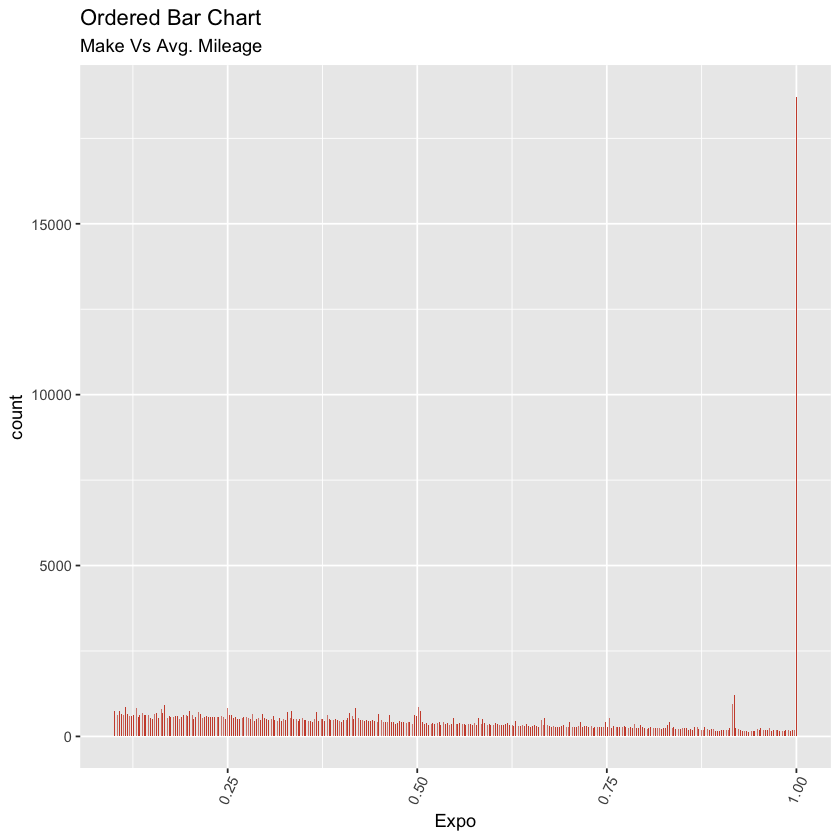

In [49]:
ggplot(data=norauto, aes(x=Expo)) +
    geom_bar(stat="count",fill="tomato3") + 
    labs(title="Ordered Bar Chart", 
       subtitle="Make Vs Avg. Mileage") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

In [20]:
table(norauto$DistLimit)


      12000 km       16000 km       20000 km 25000-30000 km        8000 km 
         34307          12969          37007          30763          15264 
      no limit 
         53689 

In [23]:
library(caret)

In [24]:
dmy <- dummyVars(" ~ .", data = norauto, fullRank = T)

In [27]:
combi_encoded <- data.frame(predict(dmy, newdata = norauto))

In [29]:
head(combi_encoded)

Male,Young,DistLimit.16000.km,DistLimit.20000.km,DistLimit.25000.30000.km,DistLimit.8000.km,DistLimit.no.limit,GeoRegion.High.,GeoRegion.Low.,GeoRegion.Low..1,GeoRegion.Medium.,GeoRegion.Medium..1,Expo,ClaimAmount,NbClaim
0,0,0,0,0,0,0,0,0,1,0,0,0.789,0,0
0,1,0,0,0,0,0,0,0,0,0,1,0.200,0,0
0,1,0,0,1,0,0,0,0,0,0,1,0.285,0,0
0,0,0,0,0,0,0,0,0,0,1,0,0.247,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0.995,18158,1
0,0,0,0,0,0,0,0,0,0,0,1,0.222,0,0


In [ ]:
###Linear model
fit_lm<-function(x,y,intercept=TRUE,lambda=0)
{
  ##Conversion to matrix if required
  if (!is.matrix(x))
  {
    x=as.matrix(x)
  }
  if (!is.matrix(y))
  {
    y=as.matrix(y)
  }
  #Add the intercept coefficient
  if (intercept)
  {
    x=cbind(1,x)
  }
  my_lm=list(intercept=intercept)
  ##Compute coefficients estimates
  # intercept <- rep(1, length(y))
  # X <- solve(t(x) %*% x) %*% t(x) %*% y
  my_lm[['coeffs']]<- solve(t(x) %*% x) %*% t(x) %*% y
  ##Compute estimates for the train dataset
  my_lm[['preds']]=x %*% my_lm[['coeffs']]
  my_lm[['residuals']]=my_lm[['preds']]-y
  my_lm[['mse']]=mean(my_lm[['residuals']]^2)
  attr(my_lm, "class") <- "my_lm"
  return(my_lm)
}

In [2]:
head(ausprivauto0405)

Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
0.3039014,1.06,old cars,Hatchback,Female,young people,0,0,0
0.6488706,1.03,young cars,Hatchback,Female,older work. people,0,0,0
0.5694730,3.26,young cars,Utility,Female,young people,0,0,0
0.3175907,4.14,young cars,Station wagon,Female,young people,0,0,0
0.6488706,0.72,oldest cars,Hatchback,Female,young people,0,0,0
0.8542094,2.01,old cars,Hardtop,Male,older work. people,0,0,0


In [50]:
fit1=lm(medv~lstat,data=Boston)

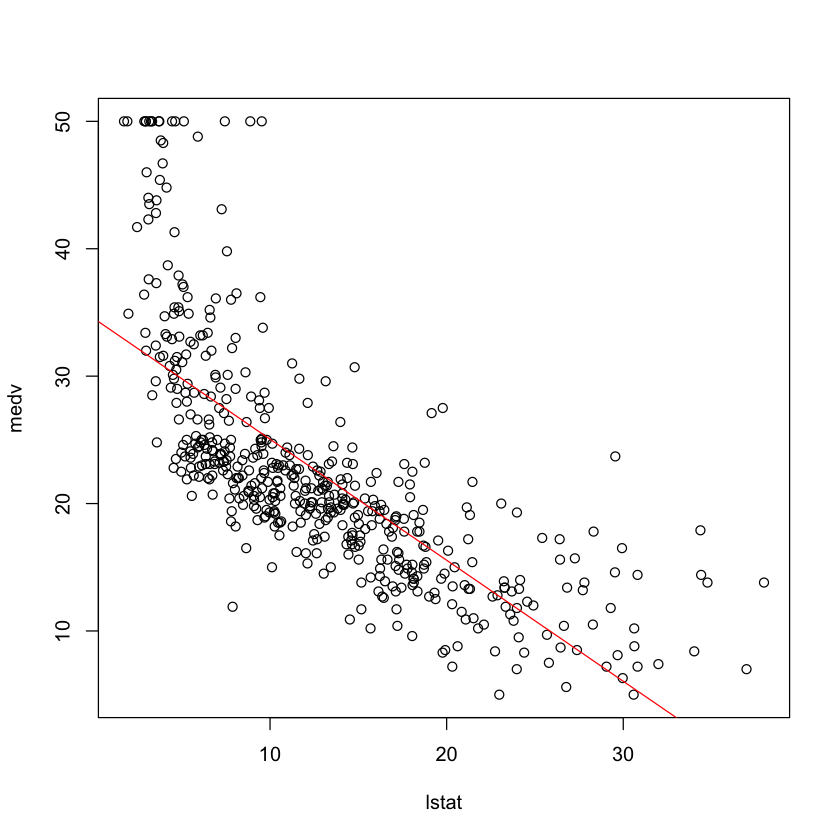

In [51]:
plot(medv~lstat,Boston)
abline(fit1,col="red")

In [52]:
fit_lm<-function(x,y,intercept=TRUE,lambda=0)
{
  ##Conversion to matrix if required
  if (!is.matrix(x))
  {
    x=as.matrix(x)
  }
  if (!is.matrix(y))
  {
    y=as.matrix(y)
  }
  #Add the intercept coefficient
  if (intercept)
  {
    x=cbind(1,x)
  }
  my_lm=list(intercept=intercept)
  ##Compute coefficients estimates
  # intercept <- rep(1, length(y))
  # X <- solve(t(x) %*% x) %*% t(x) %*% y
  my_lm[['coeffs']]<- solve(t(x) %*% x) %*% t(x) %*% y
  ##Compute estimates for the train dataset
  my_lm[['preds']]=x %*% my_lm[['coeffs']]
  my_lm[['residuals']]=my_lm[['preds']]-y
  my_lm[['mse']]=mean(my_lm[['residuals']]^2)
  attr(my_lm, "class") <- "my_lm"
  return(my_lm)
}


my_lm1=fit_lm(as.matrix(Boston[-ncol(Boston)]),Boston$medv,intercept=T,lambda=0)
vanilla_lm=lm(medv ~ ., data=Boston)
print(vanilla_lm[['coefficients']])
print(my_lm1[['coeffs']])


results <- data.frame(our.results=my_lm1[['coeffs']], lm.results=vanilla_lm[['coefficients']])
results



predict.my_lm<-function(my_lm,x,..)
{
  if (!is.matrix(x))
  {
    x=as.matrix(x)
  }
  if (my_lm[["intercept"]])
  {
    x=cbind(1,x)
  }
  x%*%my_lm[["coeffs"]]
}

  (Intercept)          crim            zn         indus          chas 
 3.645949e+01 -1.080114e-01  4.642046e-02  2.055863e-02  2.686734e+00 
          nox            rm           age           dis           rad 
-1.776661e+01  3.809865e+00  6.922246e-04 -1.475567e+00  3.060495e-01 
          tax       ptratio         black         lstat 
-1.233459e-02 -9.527472e-01  9.311683e-03 -5.247584e-01 
                 [,1]
         3.645949e+01
crim    -1.080114e-01
zn       4.642046e-02
indus    2.055863e-02
chas     2.686734e+00
nox     -1.776661e+01
rm       3.809865e+00
age      6.922246e-04
dis     -1.475567e+00
rad      3.060495e-01
tax     -1.233459e-02
ptratio -9.527472e-01
black    9.311683e-03
lstat   -5.247584e-01


,our.results,lm.results
,3.645949e+01,3.645949e+01
crim,-1.080114e-01,-1.080114e-01
zn,4.642046e-02,4.642046e-02
indus,2.055863e-02,2.055863e-02
chas,2.686734e+00,2.686734e+00
nox,-1.776661e+01,-1.776661e+01
rm,3.809865e+00,3.809865e+00
age,6.922246e-04,6.922246e-04
dis,-1.475567e+00,-1.475567e+00
rad,3.060495e-01,3.060495e-01


In [68]:
fit1


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [67]:
my_lm1

$intercept
[1] TRUE

$coeffs
                 [,1]
         3.645949e+01
crim    -1.080114e-01
zn       4.642046e-02
indus    2.055863e-02
chas     2.686734e+00
nox     -1.776661e+01
rm       3.809865e+00
age      6.922246e-04
dis     -1.475567e+00
rad      3.060495e-01
tax     -1.233459e-02
ptratio -9.527472e-01
black    9.311683e-03
lstat   -5.247584e-01

$preds
          [,1]
1   30.0038434
2   25.0255624
3   30.5675967
4   28.6070365
5   27.9435242
6   25.2562845
7   23.0018083
8   19.5359884
9   11.5236369
10  18.9202621
11  18.9994965
12  21.5867957
13  20.9065215
14  19.5529028
15  19.2834821
16  19.2974832
17  20.5275098
18  16.9114013
19  16.1780111
20  18.4061360
21  12.5238575
22  17.6710367
23  15.8328813
24  13.8062853
25  15.6783383
26  13.3866856
27  15.4639765
28  14.7084743
29  19.5473729
30  20.8764282
31  11.4551176
32  18.0592329
33   8.8110574
34  14.2827581
35  13.7067589
36  23.8146353
37  22.3419371
38  23.1089114
39  22.9150261
40  31.3576257
41  34.2151023
42 

[1]  3.645949e+01 -1.080114e-01  4.642046e-02  2.055863e-02  2.686734e+00
 [6] -1.776661e+01  3.809865e+00  6.922246e-04 -1.475567e+00  3.060495e-01
[11] -1.233459e-02 -9.527472e-01  9.311683e-03 -5.247584e-01

# Univariate Model 

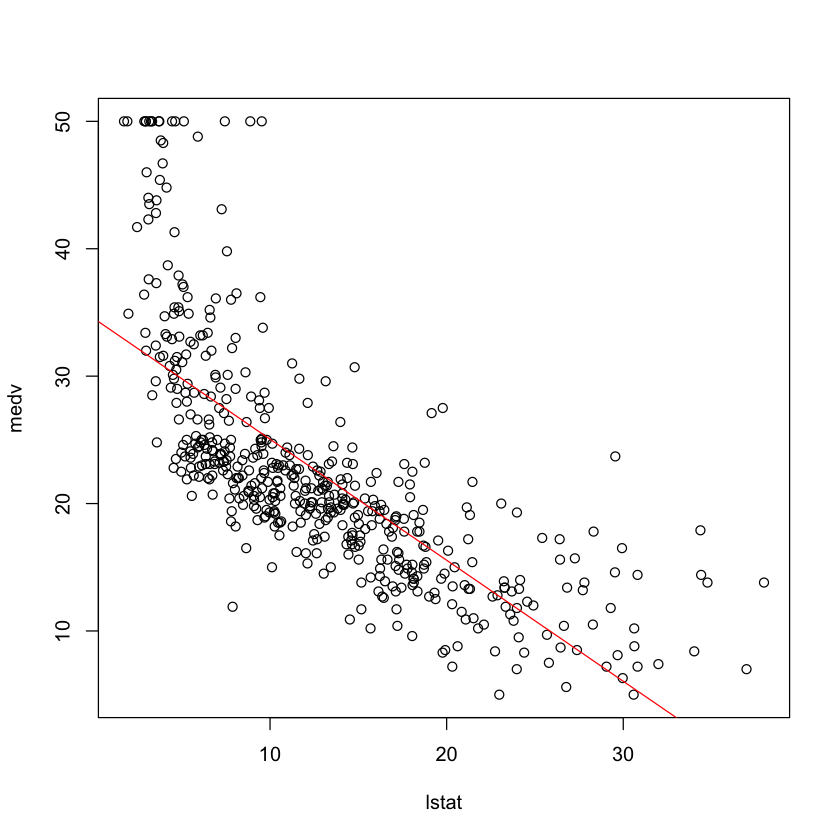

In [66]:
plot(medv~lstat,Boston)
abline(,col="red")

In [69]:
fit2=lm(medv~lstat+age,data=Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


# Multivariate model

In [71]:
fit3=lm(medv~.,data=Boston)

In [75]:
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

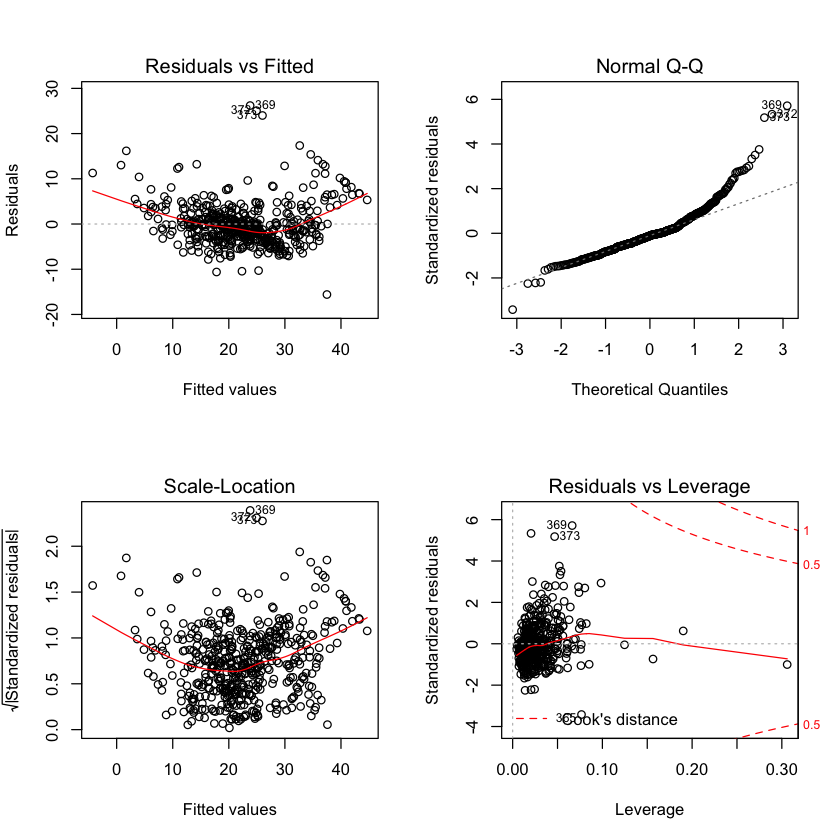

In [72]:
par(mfrow=c(2,2))
plot(fit3)

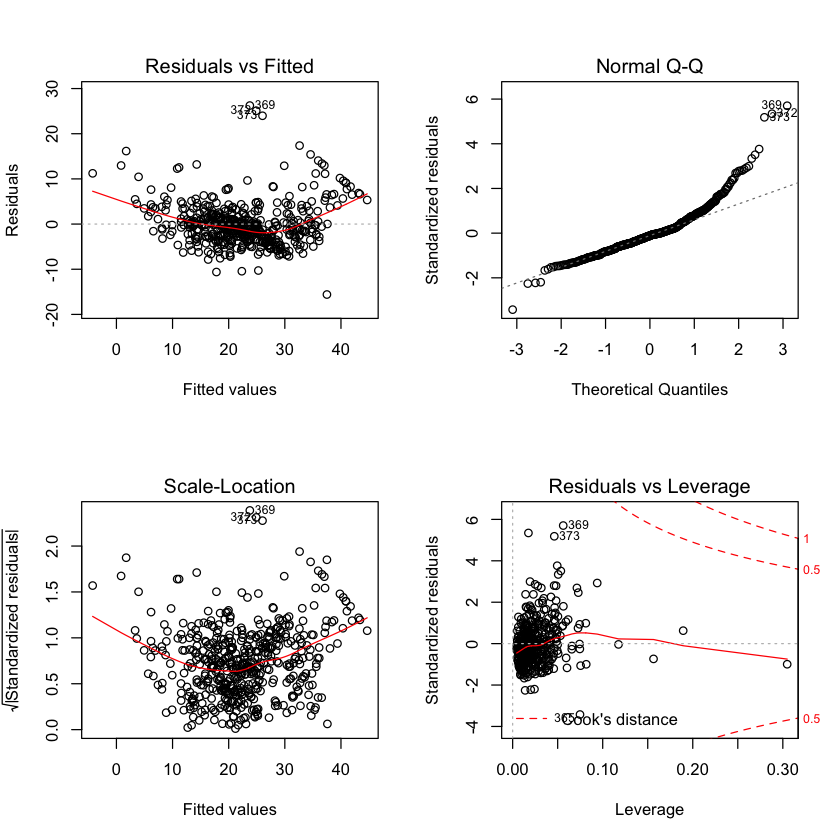

In [73]:
fit4=update(fit3,~.-age-indus)
par(mfrow=c(2,2))
plot(fit4)

In [74]:
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



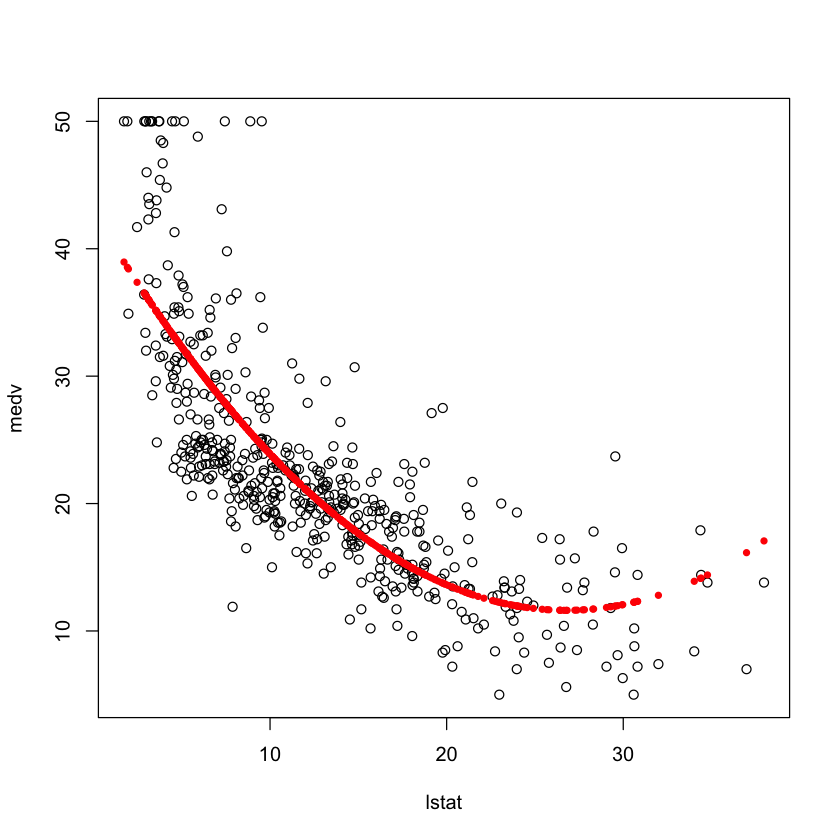

In [78]:
fit6=lm(medv~lstat +I(lstat^2),Boston)
# summary(fit6)
attach(Boston)
par(mfrow=c(1,1))
plot(medv~lstat, Boston)
points(lstat,fitted(fit6), col="red",pch=20)

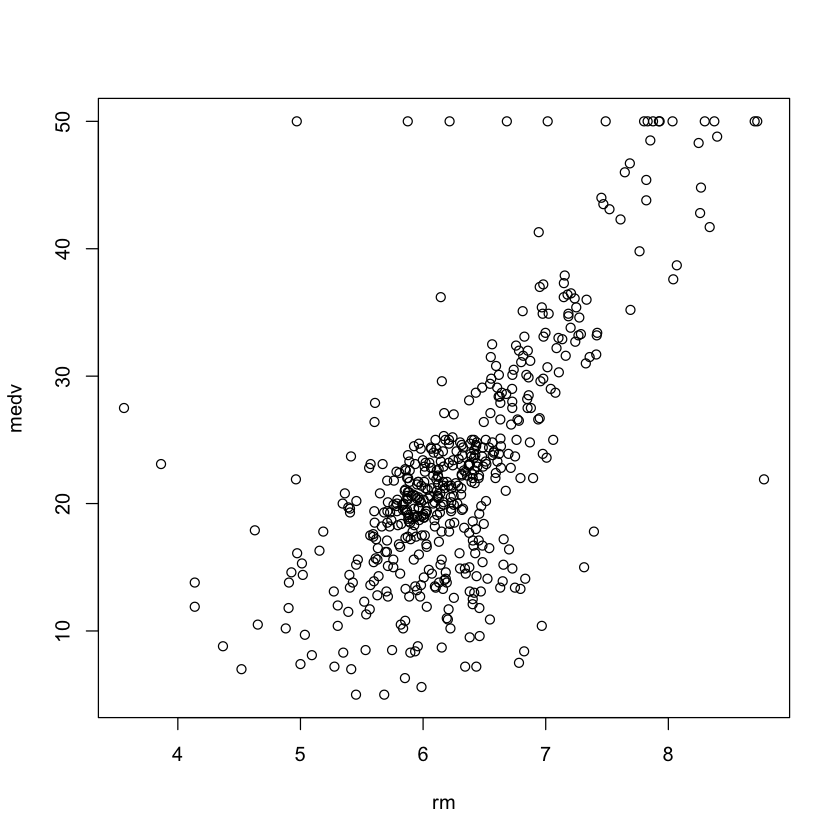

In [85]:
plot(medv~rm, Boston)

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



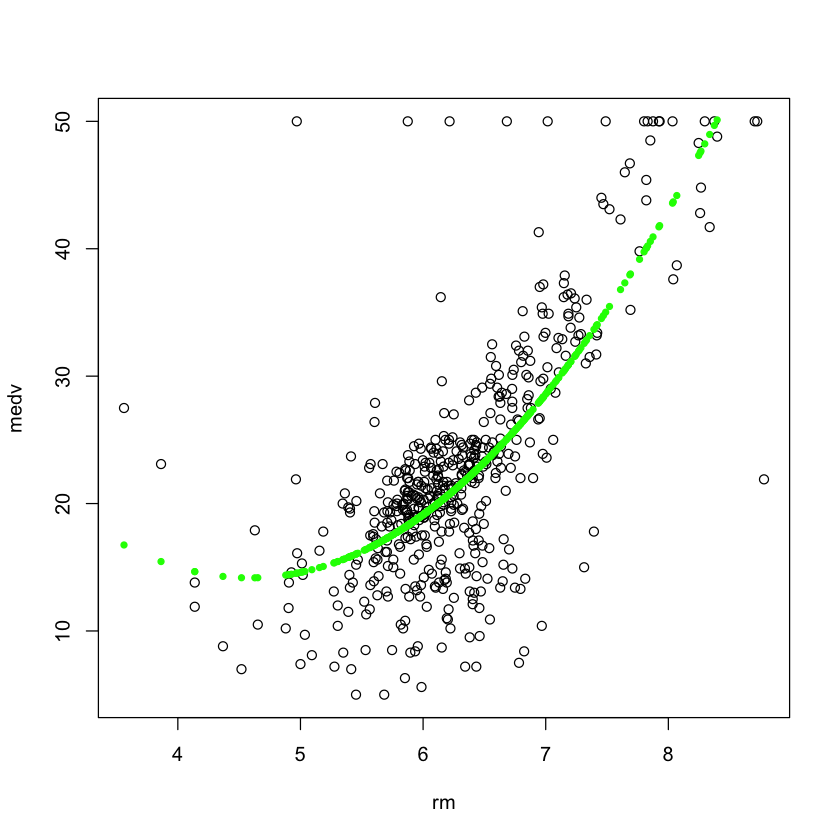

In [84]:
fit7=lm(medv~rm +I(rm^2),Boston)
# summary(fit6)
attach(Boston)
par(mfrow=c(1,1))
plot(medv~rm, Boston)
points(rm,fitted(fit7), col="green",pch=20)

In [80]:
fit6=lm(medv~lstat+crim+rm+dis+black+chas+nox+rad+tax+ptratio+I(lstat^2)+I(rm^2))
summary(fit6)


Call:
lm(formula = medv ~ lstat + crim + rm + dis + black + chas + 
    nox + rad + tax + ptratio + I(lstat^2) + I(rm^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-26.6989  -2.2722  -0.3181   1.6910  26.5553 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 116.873849   9.277693  12.597  < 2e-16 ***
lstat        -1.283203   0.118452 -10.833  < 2e-16 ***
crim         -0.147969   0.027819  -5.319 1.59e-07 ***
rm          -21.700173   2.790414  -7.777 4.38e-14 ***
dis          -1.023585   0.137258  -7.457 4.01e-13 ***
black         0.006993   0.002260   3.094 0.002087 ** 
chas          2.418864   0.720510   3.357 0.000848 ***
nox         -14.970947   2.992777  -5.002 7.89e-07 ***
rad           0.229174   0.053487   4.285 2.20e-05 ***
tax          -0.007628   0.002792  -2.732 0.006513 ** 
ptratio      -0.750995   0.104930  -7.157 3.01e-12 ***
I(lstat^2)    0.021460   0.003234   6.635 8.58e-11 ***
I(rm^2)       1.965340   0.217641   9.030  

In [91]:
install.packages("mlbench")

Installing package into ‘/Users/nour/Library/R/3.4/library’
(as ‘lib’ is unspecified)


In [92]:
library(mlbench)

In [93]:
data(BostonHousing)
housing <- BostonHousing
str(housing)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [95]:
head(housing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [97]:
library(corrplot)

corrplot 0.84 loaded


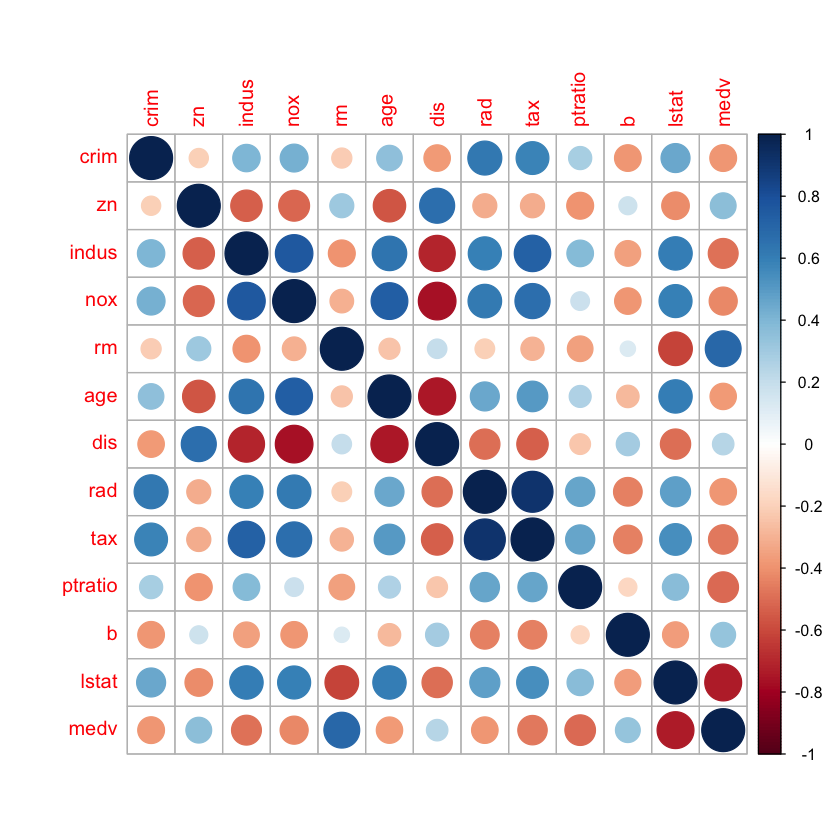

In [98]:
corrplot(cor(select(housing,-chas)))

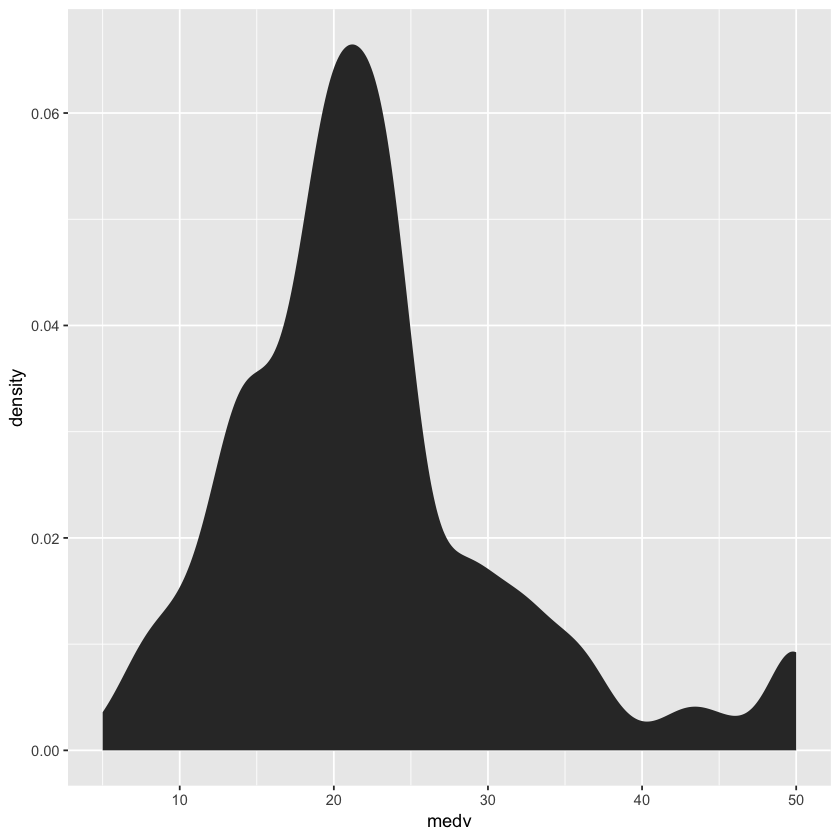

In [101]:
housing %>% 
  ggplot(aes(medv)) +
  stat_density()

In [103]:
library(reshape2)

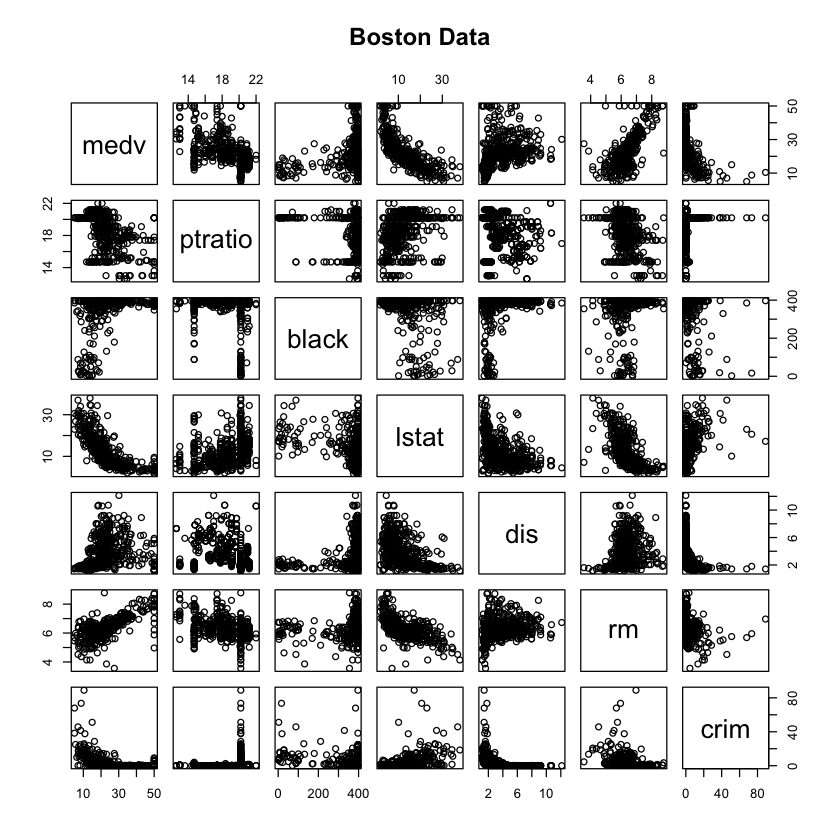

In [105]:
pairs(~ medv + ptratio + black + lstat + dis + rm + crim, data = Boston, main = "Boston Data")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.5”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 13”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.8084e-19”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 156.25”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.5”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 13”Warning message in predLoess(obj

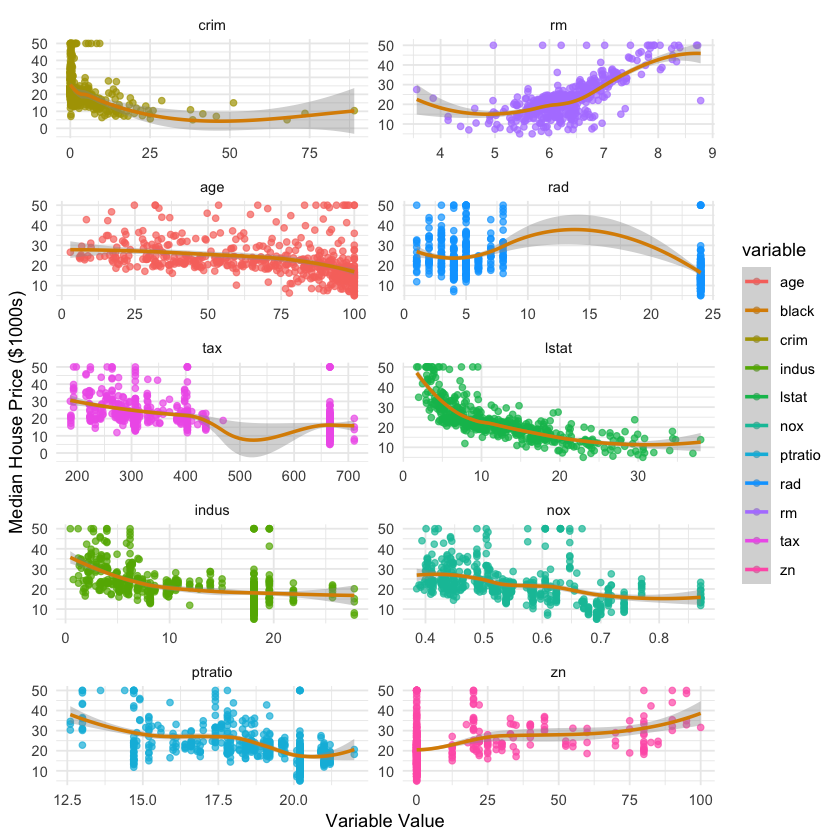

In [104]:
housing %>%
  select(c(crim, rm, age, rad, tax, lstat, medv,indus,nox,ptratio,zn)) %>%
  melt(id.vars = "medv") %>%
  ggplot(aes(x = value, y = medv, colour = variable)) +
  geom_point(alpha = 0.7) +
  stat_smooth(aes(colour = "black")) +
  facet_wrap(~variable, scales = "free", ncol = 2) +
  labs(x = "Variable Value", y = "Median House Price ($1000s)") +
  theme_minimal()

In [106]:
library(caTools)

In [107]:
split <- sample.split(housing,SplitRatio =0.75)


train <- subset(housing,split==TRUE)
test <- subset(housing,split==FALSE)

In [122]:
model <- lm(medv ~ crim + rm + tax + lstat , data = train)
summary(model)


Call:
lm(formula = medv ~ crim + rm + tax + lstat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.253  -3.441  -1.235   1.784  30.819 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.617130   3.698054  -0.437   0.6622    
crim        -0.071401   0.041867  -1.705   0.0890 .  
rm           5.227867   0.508124  10.289   <2e-16 ***
tax         -0.004734   0.002326  -2.035   0.0426 *  
lstat       -0.516040   0.059056  -8.738   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 357 degrees of freedom
Multiple R-squared:  0.6422,	Adjusted R-squared:  0.6382 
F-statistic: 160.2 on 4 and 357 DF,  p-value: < 2.2e-16


In [123]:
res <- residuals(model)

# Convert residuals to a DataFrame 

res <- as.data.frame(res)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


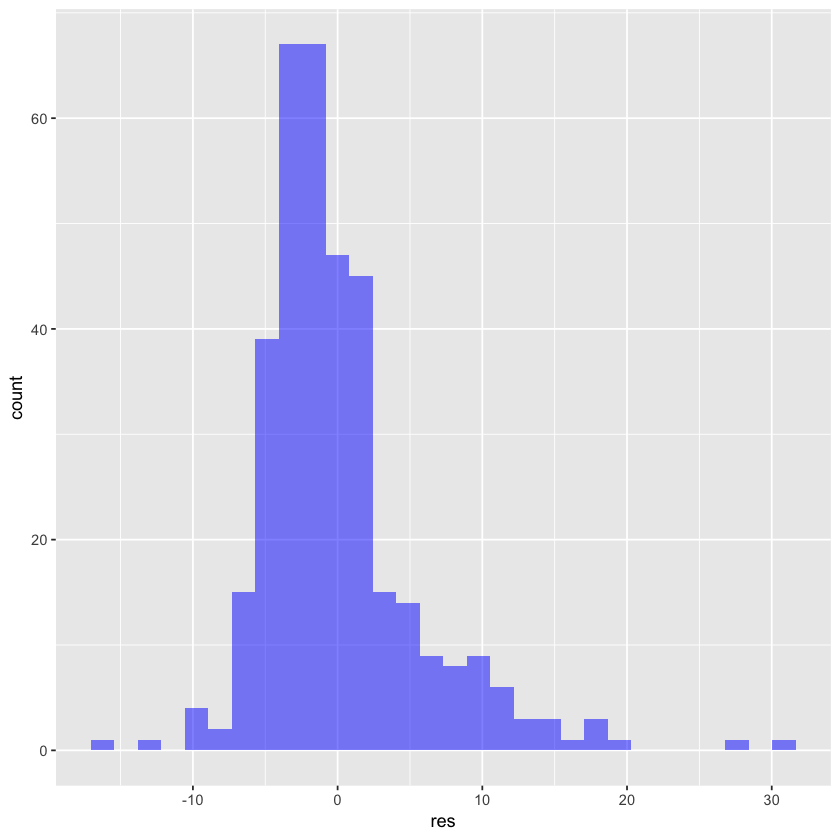

In [124]:
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

In [115]:
fit6$coefficients[-c(12,13)]

(Intercept)         lstat          crim            rm           dis 
116.873849208  -1.283202822  -0.147968756 -21.700173477  -1.023584727 
        black          chas           nox           rad           tax 
  0.006993377   2.418864417 -14.970947363   0.229173532  -0.007628029 
      ptratio 
 -0.750995081

In [117]:
test2 <- test

In [119]:
test2$vIst2 <- test$lstat**2
test2$vIrm2 <- test$rm**2

In [121]:
# predict(fit6,test2)

In [128]:
test$predicted.medv <- predict(model,test)

pl1 <-test %>% 
  ggplot(aes(medv,predicted.medv)) +
  geom_point(alpha=0.5) + 
  stat_smooth(aes(colour='black')) +
  xlab('Actual value of medv') +
  ylab('Predicted value of medv')+
  theme_bw()

# ggplotly(pl1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


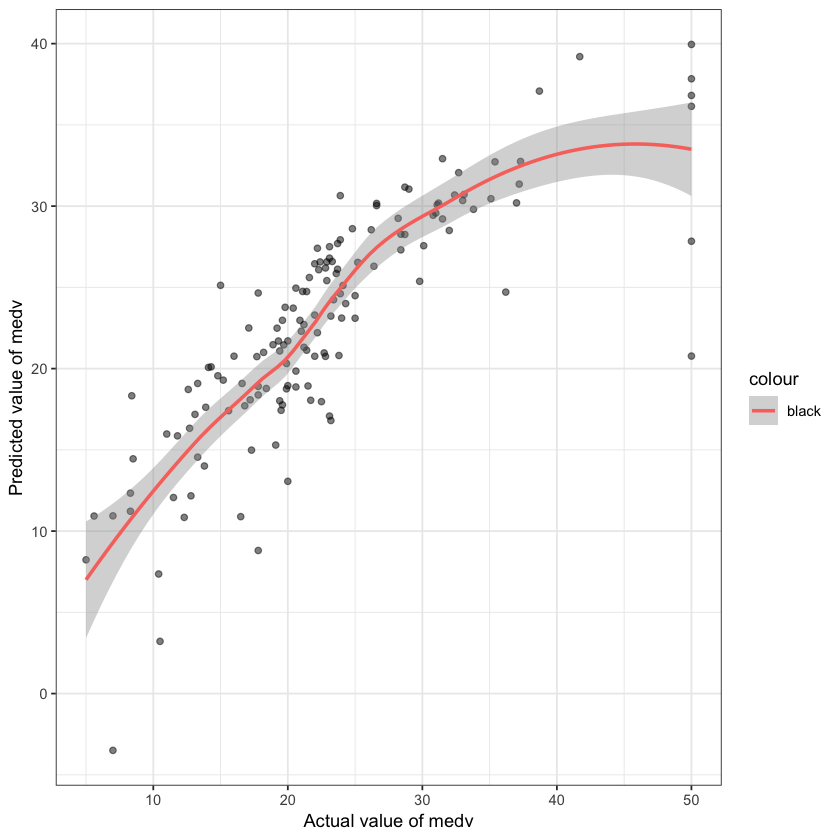

In [129]:
pl1